In [1]:
# Run this cell. Do not change it.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In the [permutation and t-test page]({{ site.baseurl
}}/chapters/05/permutation_and_t_test), we asserted that the t-test is not
valid when the underlying distribution of the numbers is not close to the
[normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)

Because you are good scientists, you ask yourselves - is that true?

Here is a function implementing a t-test between two groups:

In [2]:
# Run this code.  Do not change it.

# Get t distribution code from Scipy library
from scipy.stats import t as t_dist


def t_test(g1, g2):
    """ Return t and p value for independent sample t test

    Parameters
    ----------
    g1 : array
        Values from group 1.
    g2 : array
        Values from group 2.

    Returns
    -------
    t : float
        t statistic value
    p : float
        Probability for one-tailed upper tail test.

    Notes
    -----
    Students t-test for independent groups with equal or unequal sample sizes,
    similar variance.  See:
    https://en.wikipedia.org/wiki/Student%27s_t-test
    """
    m1 = np.mean(g1)
    m2 = np.mean(g2)
    n1 = len(g1)
    n2 = len(g2)
    df = n1 + n2 - 2
    errors = np.append(g1 - m1, g2 - m2)
    sd_est = np.sqrt(np.sum(errors ** 2) / df)
    t = (m1 - m2) / (sd_est * np.sqrt(1/n1 + 1/n2))
    p = 1 - t_dist.cdf(t, df)
    return t, p

First we check that this function gives the same answer as the equivalent Scipy
function for an independent sample t-test.  We recreate the data from the
[permutation and t-test page]({{ site.baseurl
}}/chapters/05/permutation_and_t_test):

In [3]:
beer_activated = np.array([14, 33, 27, 11, 12, 27, 26,
                           25, 27, 27, 22, 36, 37,  3,
                           23,  7, 25, 17, 36, 31, 30,
                           22, 20, 29, 23])
water_activated = np.array([33, 23, 23, 13, 24,  8,  4,
                            21, 24, 21, 26, 27, 22, 21,
                            25, 20,  7, 3])

We run our t-test over these data:

In [4]:
t_test(beer_activated, water_activated)

(1.640250605001883, 0.054302080886695414)

We run the Scipy equivalent to check we get the same answer:

In [5]:
from scipy.stats import ttest_ind
res = ttest_ind(beer_activated, water_activated)
print('Scipy t statistic:', res.statistic)
print('Scipy one-tail p value:', res.pvalue / 2)

Scipy t statistic: 1.6402506050018828
Scipy one-tail p value: 0.054302080886695414


How would we check the assertion that the t-test is not valid for not-normal
distributions?


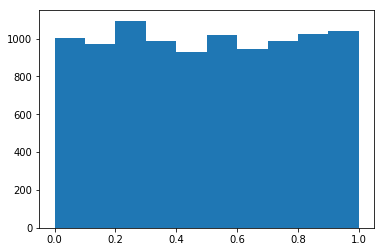

In [6]:
n_iters = 10000
p_values = np.zeros(n_iters)
for i in np.arange(n_iters):
    randoms = np.random.normal(1, size=40)
    t, p = t_test(randoms[:5], randoms[5:])
    p_values[i] = p
plt.hist(p_values);

In [7]:
np.count_nonzero(p_values <= 0.05) / n_iters

0.052